In [35]:
from sklearn.decomposition import PCA
import pandas as pd
import os
import matplotlib.pyplot as plt

In [36]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<br>

In [37]:
path = "./data/tables-of-EU-policy/"
files = os.listdir(path+"converted/")
mip_countries = pd.read_csv("./mip_countries.csv", index_col=0)
dict_code2country = pd.read_csv("./country_codes.csv", sep='\t', index_col=0)["English"].to_dict()
dict_country2code = dict(zip(dict_code2country.values(),dict_code2country.keys()))

## **tips** Macroeconomic imbalance procedure indicators
- **tips_h** - MIP Scoreboard indicators
- **tipsbp** - Current account balance and balance of payments
- **tipsii** - International investment position
- **tipsed** - External debt
- **tipser** - Effective exchange rates
- **tipsex** - Export market shares
- **tipsgo** - General government gross debt (EDP concept)
- **tipsfs** - Financial sector liabilities
- **tipspd** - Private sector debt
- **tipspc** - Private sector credit flow
- **tipsnf** - Non-financial transactions - annual data
- **tipsun** - Unemployment
- **tipslc** - Unit labour cost
- **tipsho** - House price indices
- **tipspo** - Poverty and social exclusion
- **tipsgd** - Gross domestic product (GDP)
- **tipsrd** - Research and development
- **mips_sa** - Macroeconomic imbalance procedure - Statistical annex indicators

In [38]:
tips = ["tips_h", "tipsbp", "tipsii", "tipsed", "tipser", "tipsex", "tipsgo", "tipsfs", "tipspd", "tipspc", "tipsnf", "tipsun", "tipslc", "tipsho", "tipspo", "tipsgd", "tipsrd", "mips_sa"]

- *tipsbp10* - Current account balance - 3 year average (tipsbp10)
- *tipsii10* - Net international investment position - annual data (tipsii10)
- *tipser10* - Real effective exchange rate (42 trading partners, based on HICP/CPI) (tipser10)
- *tipsex10* - Export market shares - 5 years % change (tipsex10)
- *tipslm10* - Nominal unit labour cost - 3 years % change (tipslm10)
- *tipsho10* - House price index, deflated - annual data (tipsho10)
- *tipspc20* - Private sector credit flow, consolidated - % GDP (tipspc20)
- *tipspd20* - Private sector debt, consolidated - % of GDP (tipspd20)
- *tipsgo10* - General government gross debt (EDP concept), consolidated - annual data (tipsgo10)
- *tipsun10* - Unemployment rate - 3 year average (tipsun10)
- *tipsfs10* - Total financial sector liabilities, non-consolidated - annual data (tipsfs10)
- *tipslm60* - Activity rate - % of total population aged 15-64 (tipslm60)
- *tipslm70* - Long-term unemployment rate, % of active population aged 15-74 (tipslm70)
- *tipslm80* - Youth unemployment rate - % of active population aged 15-24 (tipslm80)


In [44]:
tips_h = ["tipsbp10", "tipsii10", "tipser10", "tipsex10", "tipslm10", "tipsho10", "tipspc20", "tipspd20", "tipsgo10", "tipsun10", "tipsfs10", "tipslm60", "tipslm70", "tipslm80"]

<br>

In [48]:
output = pd.DataFrame(index=dict_code2country.keys(), columns=range(2012,2019))
mip_degrees = dict(zip(list(mip_countries.columns),range(0,6)))
for i, row in mip_countries.iterrows():
    for degree in mip_degrees.keys():
        if type(row[degree]) ==str:
            for country in row[degree].split(", "):
                output.loc[dict_country2code[country]][i] = mip_degrees[degree]

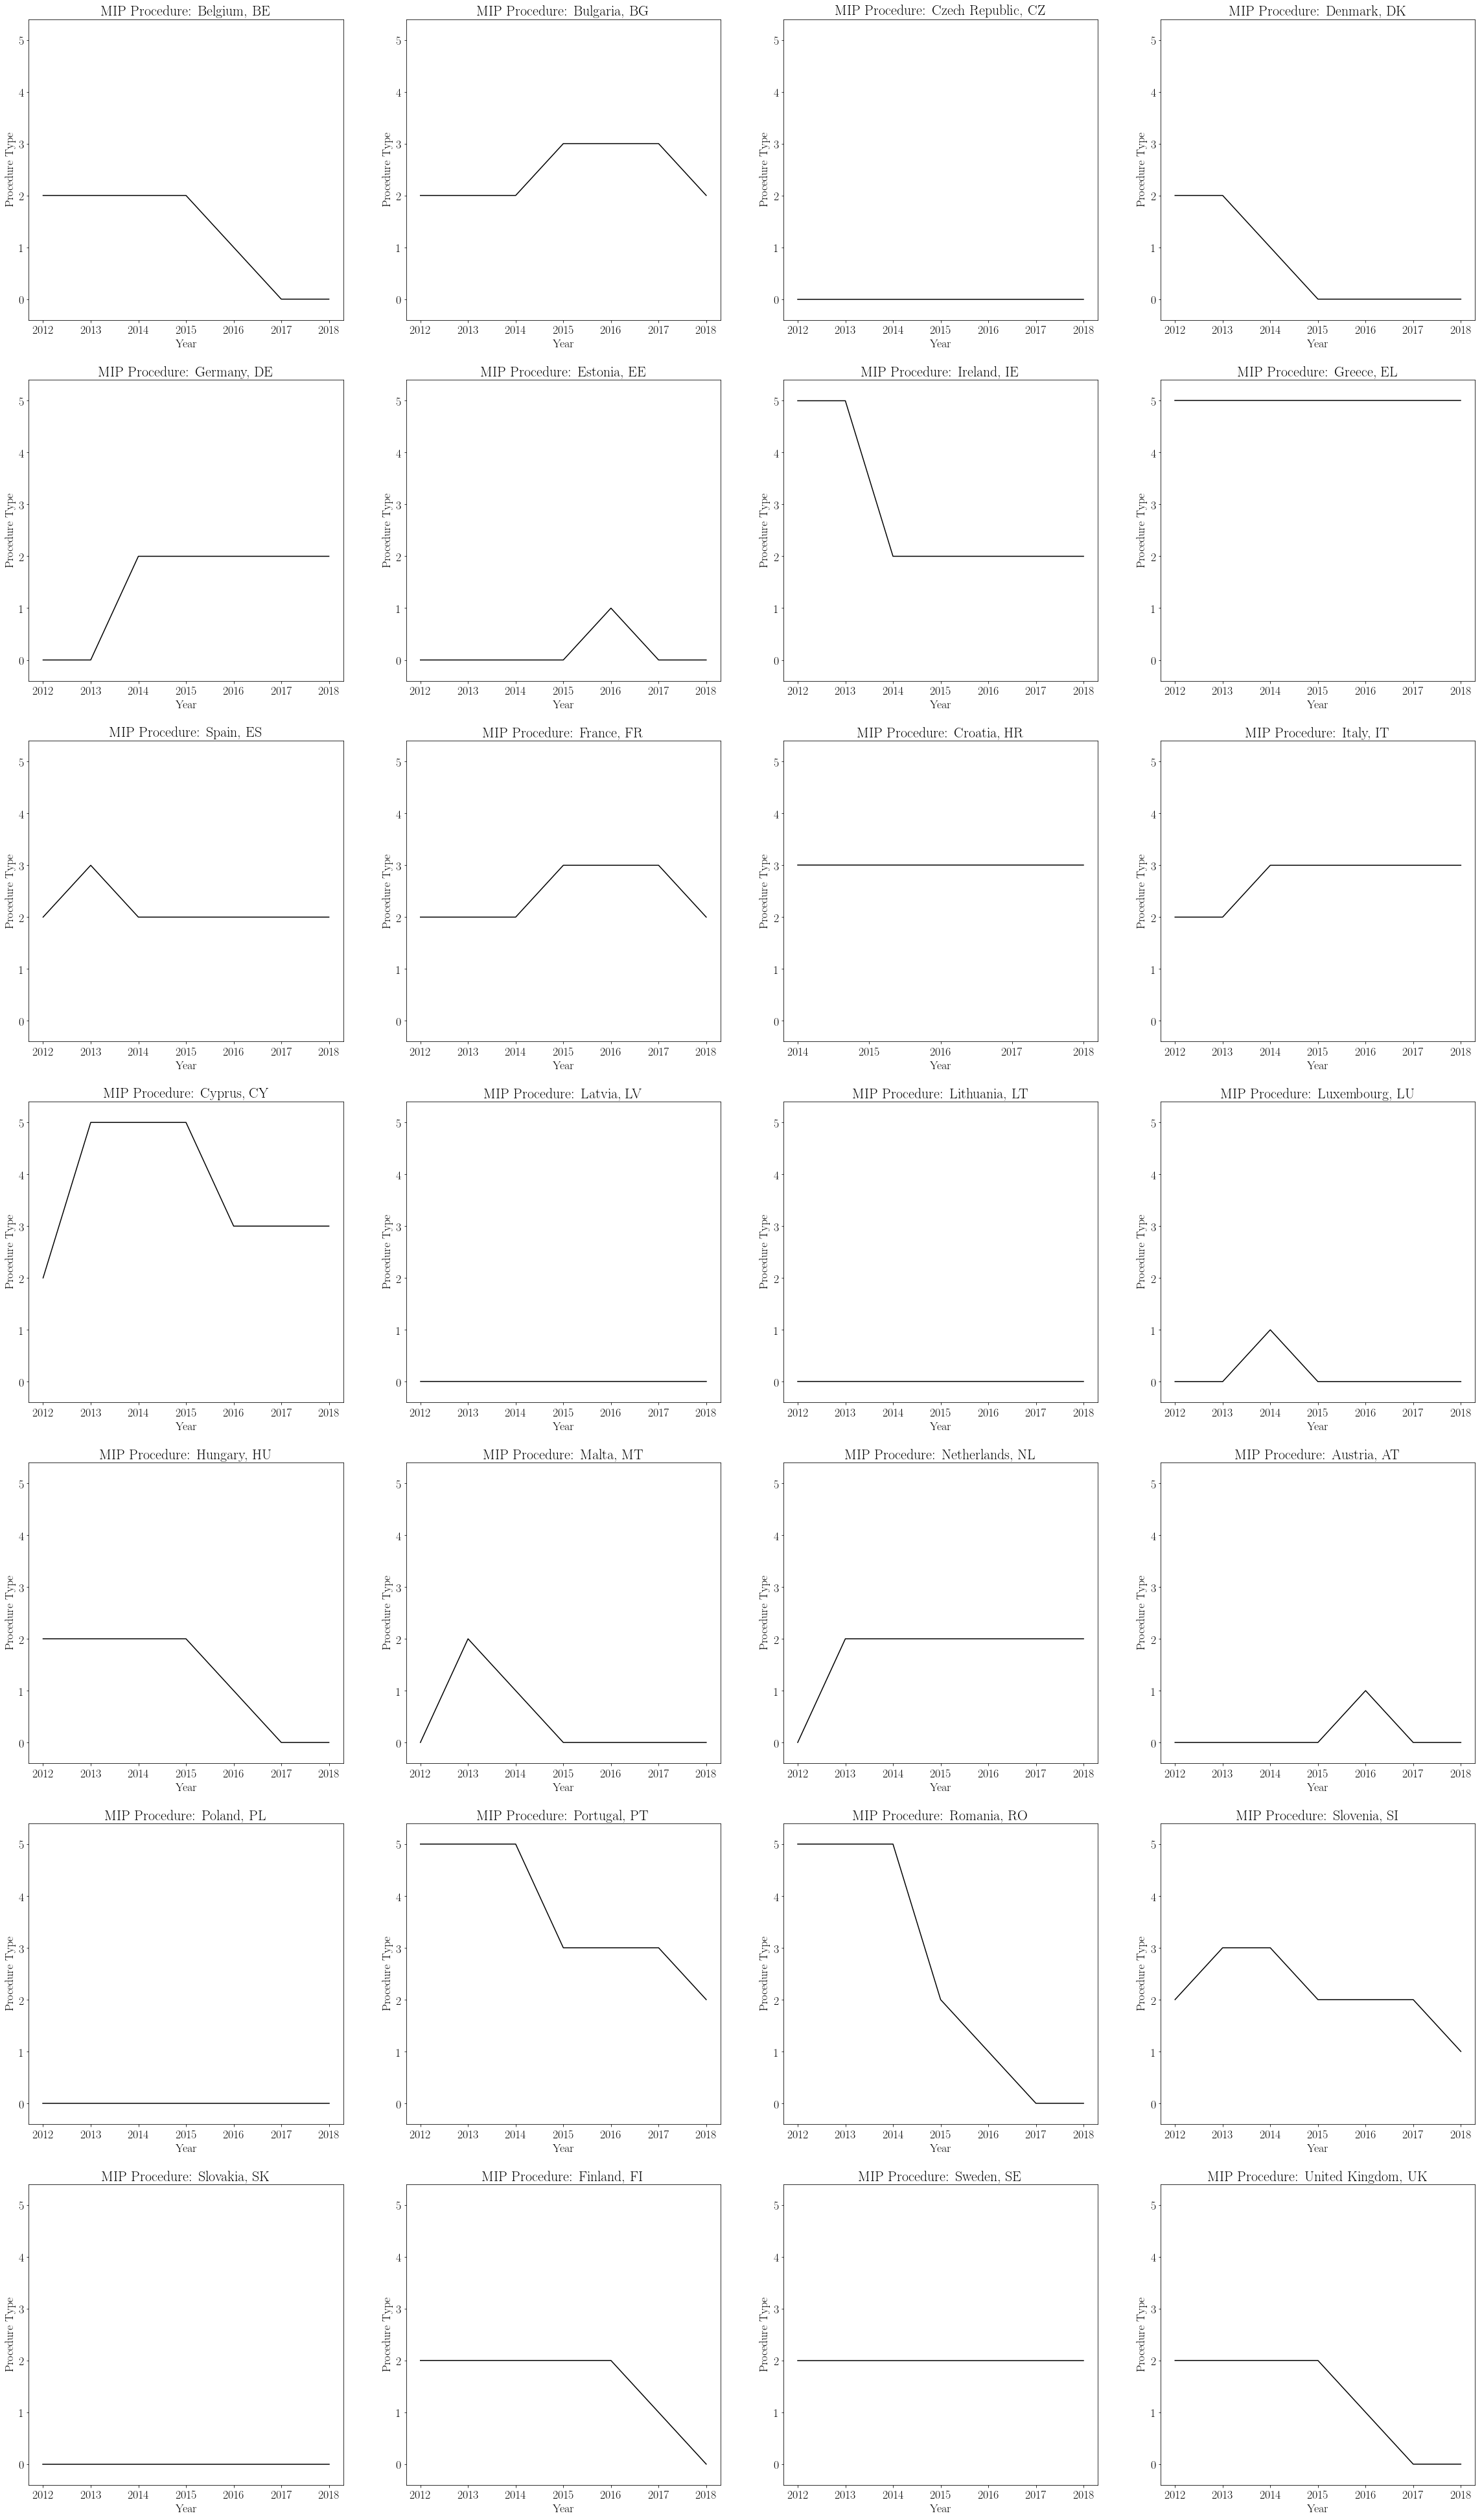

In [102]:
f, axes = plt.subplots(nrows=7, ncols=4, figsize=(40, 70)); axes = axes.flatten()
for i, country in enumerate(output.transpose().columns):
    output.transpose()[country].plot(ax=axes[i], color="black")
    axes[i].set_title("MIP Procedure: "+dict_code2country[country]+", "+country, fontsize=22)
    axes[i].set_ylabel("Procedure Type")
    axes[i].set_xlabel("Year")
    axes[i].set_ylim(-0.4,5.4)

<br>

In [103]:
df_temp = pd.read_csv(path+"converted/"+tips_h[0]+".csv")
df_temp.date = pd.to_datetime(df_temp.date)

In [109]:
dict_country2code["Belgium"]

'BE'

In [112]:
df_temp[df_temp.geotime == "BE"]

,unit,s_adj,bop_item,stk_flow,partner,geotime,date,value
23,PC_GDP_3Y,NSA,CA,BAL,WRL_REST,BE,1995-01-01,NaN
24,PC_GDP_3Y,NSA,CA,BAL,WRL_REST,BE,1996-01-01,NaN
25,PC_GDP_3Y,NSA,CA,BAL,WRL_REST,BE,1997-01-01,NaN
26,PC_GDP_3Y,NSA,CA,BAL,WRL_REST,BE,1998-01-01,NaN
27,PC_GDP_3Y,NSA,CA,BAL,WRL_REST,BE,1999-01-01,NaN
28,PC_GDP_3Y,NSA,CA,BAL,WRL_REST,BE,2000-01-01,NaN
29,PC_GDP_3Y,NSA,CA,BAL,WRL_REST,BE,2001-01-01,NaN
30,PC_GDP_3Y,NSA,CA,BAL,WRL_REST,BE,2002-01-01,NaN
31,PC_GDP_3Y,NSA,CA,BAL,WRL_REST,BE,2003-01-01,NaN
32,PC_GDP_3Y,NSA,CA,BAL,WRL_REST,BE,2004-01-01,NaN
